# Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import skccm as ccm
import matplotlib.pyplot as plt
import seaborn as sns
from skccm.utilities import train_test_split
from teaspoon.parameter_selection.FNN_n import FNN_n

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [ ]:
crime_2012 = pd.read_excel('crime_2012.xlsx')
crime_2013 = pd.read_excel('crime_2013.xlsx')
crime_2014 = pd.read_excel('crime_2014.xlsx')
crime_2015 = pd.read_excel('crime_2015.xlsx')
crime_2016 = pd.read_excel('crime_2016.xlsx')
crime_2017 = pd.read_excel('crime_2017.xlsx')
crime_2018 = pd.read_excel('crime_2018.xlsx')
crime_2019 = pd.read_excel('crime_2019.xlsx')
crime_2020 = pd.read_excel('crime_2020.xlsx')

In [ ]:
crime_2012_dfa = crime_2012[['state_abb','year', 'month','actual_rape_total']]
crime_2012_dfa

In [ ]:
crime_2012_df = crime_2012[['agency_name','state_abb','year', 'month', 'actual_rape_total']]
crime_2012_df

In [ ]:
total_cols = crime_2012_df.columns
total_state = crime_2012_df['state_abb'].unique()
months = crime_2012_df['month'].unique()

cols = list(set(crime_2012_df.columns))

target = {}

for col in cols:
    target[col] = []


for state in total_state:
    for month in months:
        filt = (crime_2012_df['month']==month) & (crime_2012_df['state_abb']==state)
        temp_df = crime_2012_df[filt]
        
        numeric_cols = total_cols[3:]
        
        for col in numeric_cols:
            target[col].append(temp_df[col].sum())
        
        target['state_abb'].append(state)
        target['month'].append(month)
        target['year'] = crime_2012_df['year'].unique().tolist()[0]
        

target_df = pd.DataFrame(target)

In [ ]:
target_df_2012 = target_df[['state_abb','year', 'month', 'actual_rape_total']]
target_df_2012

In [ ]:
total_cols1 = target_df.columns
cols1 = list(set(target_df.columns) - {'state_abb'})

target2 = {}

for col in cols1:
    target2[col] = []


for month in months:
    filt = (target_df['month']==month) 
    temp_df = target_df[filt]
        
    numeric_cols = list(set(cols1) - {'year', 'month'})
        
    for col in numeric_cols:
        target2[col].append(temp_df[col].sum())
        
    target2['month'].append(month)
        
    target2['year'].append(target_df['year'].unique().tolist()[0])
        

target_df2 = pd.DataFrame(target2)

In [ ]:
target_df_2012_country = target_df2[['year', 'month', 'actual_rape_total']]
target_df_2012_country

In [ ]:
def state_wise(crime_df):
    total_cols = crime_df.columns
    total_state = crime_df['state_abb'].unique()
    months = crime_df['month'].unique()

    cols = list(set(crime_df.columns))

    target = {}

    for col in cols:
        target[col] = []


    for state in total_state:
        for month in months:
            filt = (crime_df['month']==month) & (crime_df['state_abb']==state)
            temp_df = crime_df[filt]
        
            numeric_cols = total_cols[3:]
        
            for col in numeric_cols:
                target[col].append(temp_df[col].sum())

            target['state_abb'].append(state)
            target['month'].append(month)
            target['year'] = crime_df['year'].unique().tolist()[0]


    target_df = pd.DataFrame(target)

    target_df_year = target_df[['state_abb','year', 'month', 'population','actual_rape_total', 'actual_all_crimes','tot_clr_rape_total','tot_clr_all_crimes','clr_18_rape_total','clr_18_all_crimes','unfound_rape_total','unfound_all_crimes']]
    return target_df_year


def country_wise(target_df):
    total_cols1 = target_df.columns
    cols1 = list(set(target_df.columns) - {'state_abb'})

    target2 = {}

    for col in cols1:
        target2[col] = []


    for month in months:
        filt = (target_df['month']==month) 
        temp_df = target_df[filt]

        numeric_cols = list(set(cols1) - {'year', 'month'})

        for col in numeric_cols:
            target2[col].append(temp_df[col].sum())

        target2['month'].append(month)

        target2['year'].append(target_df['year'].unique().tolist()[0])


    target_df2 = pd.DataFrame(target2)

    target_df_country = target_df2[['year', 'month', 'population','actual_rape_total', 'actual_all_crimes','tot_clr_rape_total','tot_clr_all_crimes','clr_18_rape_total','clr_18_all_crimes','unfound_rape_total','unfound_all_crimes']]
    return target_df_country

In [ ]:
crime = [crime_2012, crime_2013, crime_2014, crime_2015, crime_2016, crime_2017, crime_2018, crime_2019, crime_2020]
for file in crime:
    file = file[['state_abb','year', 'month', 'population','actual_rape_total', 'actual_all_crimes','tot_clr_rape_total','tot_clr_all_crimes','clr_18_rape_total','clr_18_all_crimes','unfound_rape_total','unfound_all_crimes']]
    state_wise_df = state_wise(file)
    country_wise_df = country_wise(state_wise_df)
    filename = state_wise_df['year'].unique().tolist()[0]
    state_wise_df.to_csv(f'{filename}_state_wise.csv')
    country_wise_df.to_csv(f'{filename}_country_wise.csv')
    print(f'{filename} Done.')

In [ ]:
crime_data = pd.read_excel('Crime_Country_Wise.xlsx')
crime_data = crime_data[['year', 'month', 'actual_rape_total']]
crime_data 

# Fit Convergent Cross Mapping Model to Data Sets

In this file, it includes two main parts which are fitting CCM based on State wise and Country wise. Also, there are two models respectively:

i) Misogyny tweets against total rape and 
ii) Misogyny tweets against first differences of total rape count

# FBI Uniform Crime Reporting (UCR) Program Dataset

In [3]:
# from 2012-2020 9 years in total, 12 months for each year
merged_data = pd.read_csv('merged_data.csv',index_col=0)
merged_data = merged_data.sort_values(by=['year','month'],ascending=[True, True])

In [4]:
merged_data.head()

,USstate,year,month,nTweets_x,nTweets_y,Number of establishments (ESTAB),full,population,actual_rape_total,cost_of_living_index
0,ga,2012,1,162945.0,5.0,843.0,Georgia,9986384,186,77.770000
108,nj,2012,1,17721.0,2.0,1656.0,New Jersey,8925939,83,84.134292
324,md,2012,1,25993.0,1.0,1168.0,Maryland,6067471,84,84.071647
432,tx,2012,1,105604.0,6.0,1910.0,Texas,26143479,628,68.166168
540,az,2012,1,62231.0,1.0,208.0,Arizona,6572455,205,74.997196


# Part A: State-wise

In [5]:
state_list = list(set(merged_data['USstate'].to_list()))
print(len(state_list))

41


## 1. Quick View

### i). Total Rape Crime 

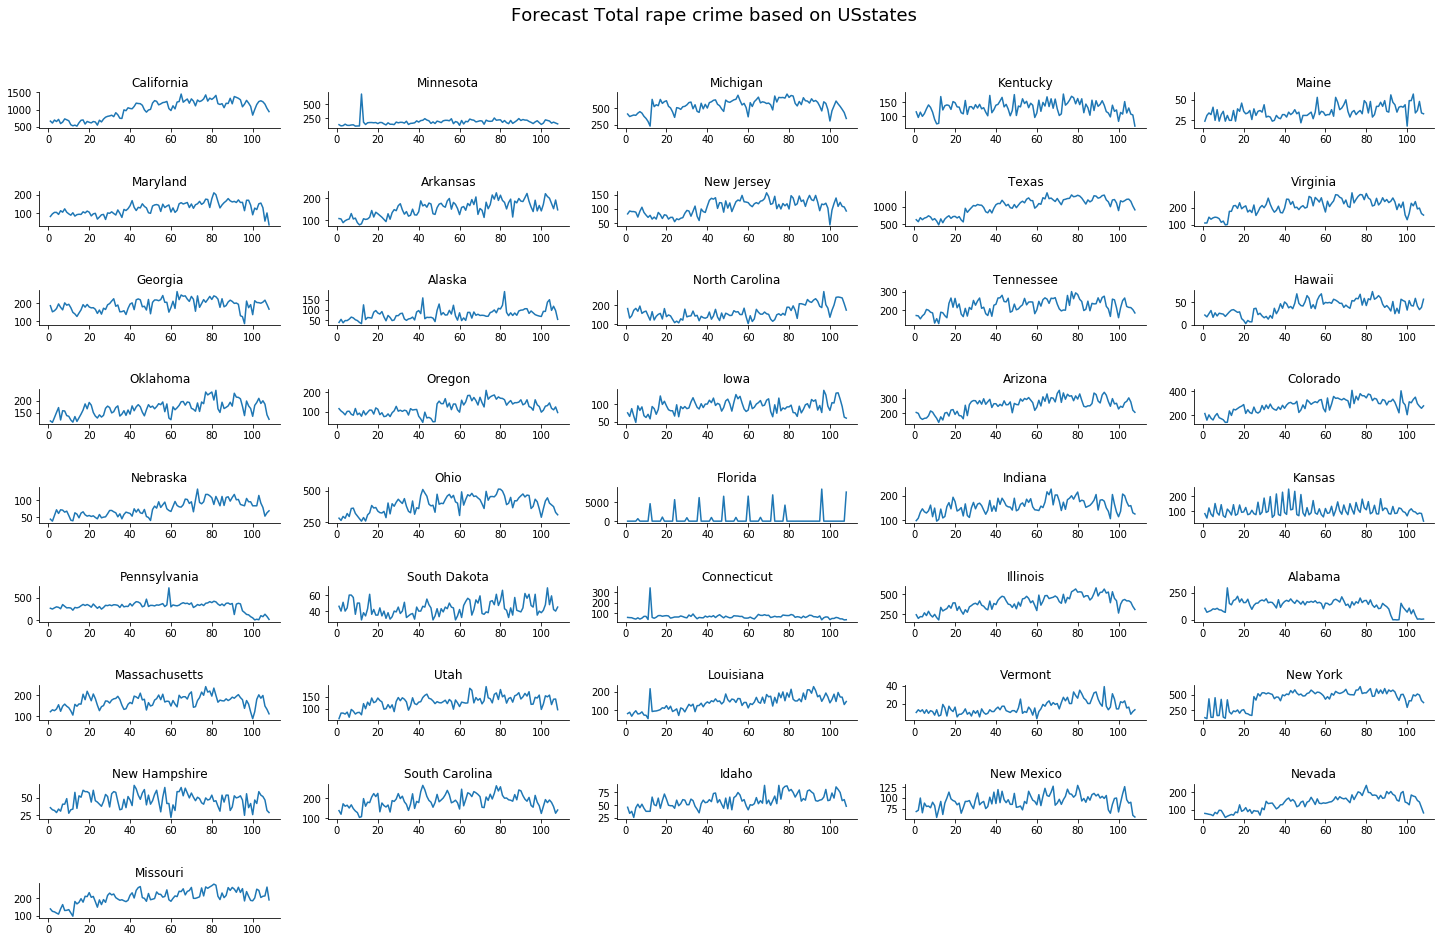

In [6]:
plt.figure(figsize=(25, 17))
plt.subplots_adjust(hspace=1.8)
plt.suptitle("Forecast Total rape crime based on USstates", fontsize=18, y=0.95)

for i in range(len(state_list)):
    
    data = merged_data[merged_data['USstate']==state_list[i]]
    curr_state = data['full'].iloc[0]
    data = data.groupby(['year','month']).sum()

    x1_rape_total = data['actual_rape_total'].to_numpy()

    # plot
    ax = plt.subplot(10, 5, i+1)
    ax.plot(np.arange(1,109),x1_rape_total)
    ax.set_title(curr_state)
    sns.despine()
    
plt.savefig('Forecast Total rape crime based on USstates.png')

### ii). First Differences of Rape Count

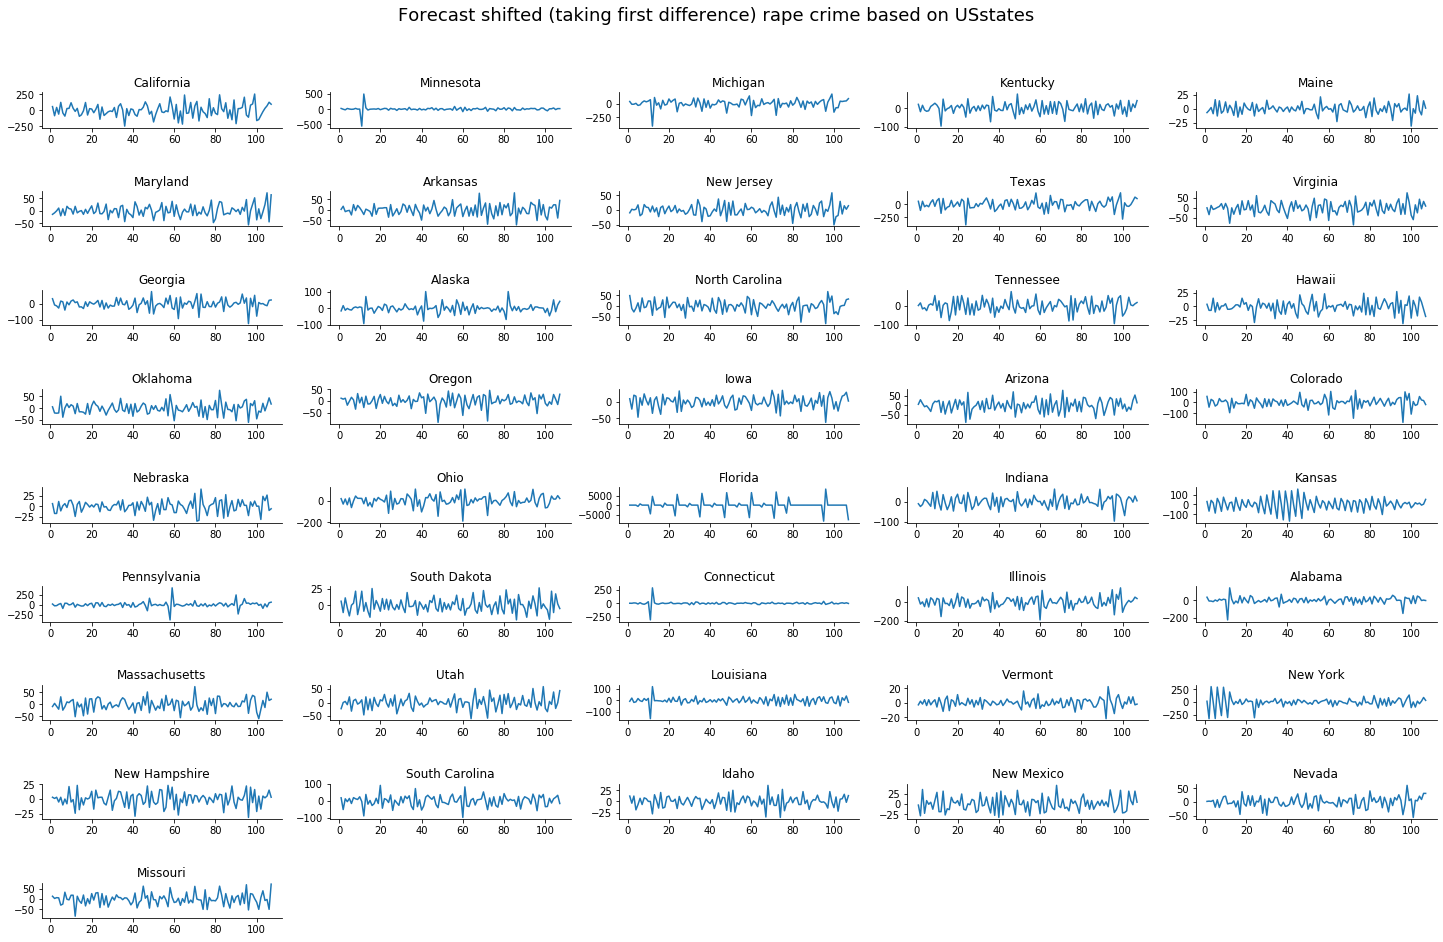

In [7]:
plt.figure(figsize=(25, 17))
plt.subplots_adjust(hspace=1.8)
plt.suptitle("Forecast shifted (taking first difference) rape crime based on USstates", fontsize=18, y=0.95)

for i in range(len(state_list)):
    
    data = merged_data[merged_data['USstate']==state_list[i]]
    curr_state = data['full'].iloc[0]
    data = data.groupby(['year','month']).sum()
    data['shifted_rape_total'] = data['actual_rape_total'] - data['actual_rape_total'].shift(-1)

    x1_shifted_rape_total = data['shifted_rape_total'].to_numpy()

    # plot
    ax = plt.subplot(10, 5, i+1)
    ax.plot(np.arange(1,109),x1_shifted_rape_total)
    ax.set_title(curr_state)
    sns.despine()
    
plt.savefig('Forecast shifted (taking first difference) rape crime based on USstates.png')

In [8]:
data['shifted_rape_total'] = data['shifted_rape_total'].fillna(0)
data

nTweets_x  nTweets_y  Number of establishments (ESTAB)  \
year month                                                           
2012 1        21438.0        2.0                        378.000000   
     2        74702.0        4.0                        378.000000   
     3       107892.0        3.0                        378.000000   
     4        76654.0        2.0                        378.000000   
     5        51574.0        1.0                        378.000000   
...               ...        ...                               ...   
2020 8        89164.4        1.0                        403.455682   
     9        90118.6        1.0                        404.227143   
     10       91072.8        1.0                        405.070226   
     11       92027.0        1.0                        405.992116   
     12       77869.0        1.0                        407.000000   

            population  actual_rape_total  cost_of_living_index  \
year month                                                        
2012 1         6064498                139             76.071354   
     2         6064498                125             76.473444   
     3         6064498                122             76.847064   
     4         6064498                115             77.193005   
     5         6064498                109             77.512061   
...                ...                ...                   ...   
2020 8         6250507                205             71.374408   
     9         6250507                212             71.446278   
     10        6250507                214             71.386453   
     11        6250507                265             71.172004   
     12        6250507                191             70.780000   

            shifted_rape_total  
year month                      
2012 1                    14.0  
     2                     3.0  
     3                     7.0  
     4                     6.0  
     5                   -30.0  
...                        ...  
2020 8                    -7.0  
     9                    -2.0  
     10                  -51.0  
     11                   74.0  
     12                    0.0  

[108 rows x 7 columns]

### iii). Misogyny tweets

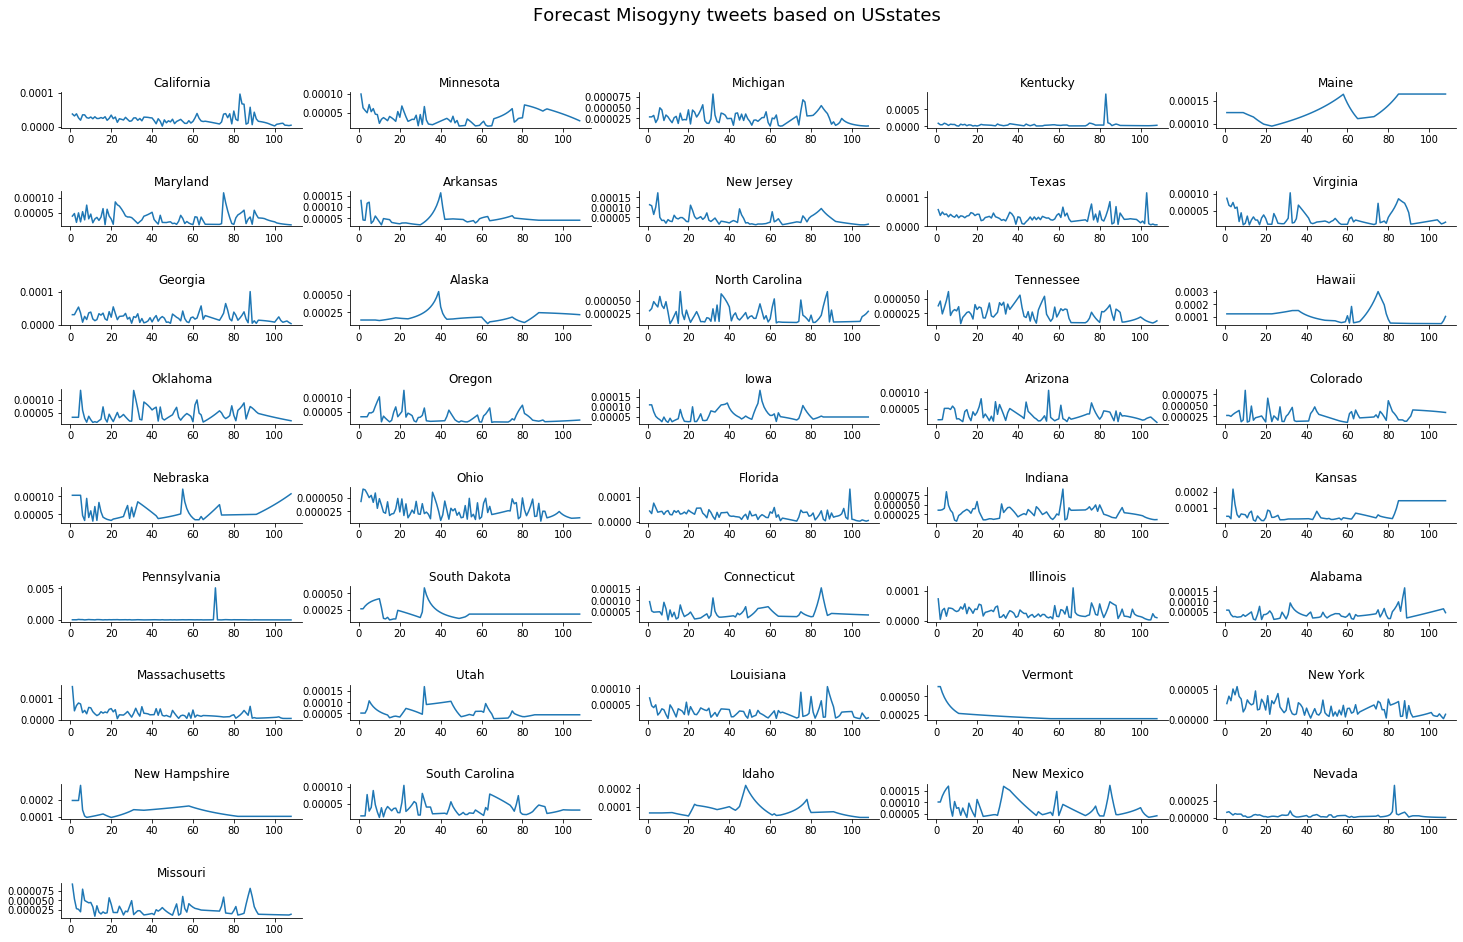

In [9]:
plt.figure(figsize=(25, 17))
plt.subplots_adjust(hspace=1.8)
plt.suptitle("Forecast Misogyny tweets based on USstates", fontsize=18, y=0.95)

for i in range(len(state_list)):
    
    data = merged_data[merged_data['USstate']==state_list[i]]
    curr_state = data['full'].iloc[0]
    data = data.groupby(['year','month']).sum()
    data['misogyny_proportion'] = data['nTweets_y'] / data['nTweets_x']
    
    x2_misogyny_proportion = data['misogyny_proportion'].to_numpy()
    

    # plot
    ax = plt.subplot(10, 5, i+1)
    ax.plot(np.arange(1,109),x2_misogyny_proportion)
    ax.set_title(curr_state)
    sns.despine()
    
plt.savefig('Forecast Misogyny tweets based on USstates.png')

# 2. Fit CCM

### i). Rape Count vs Misogyny Tweets

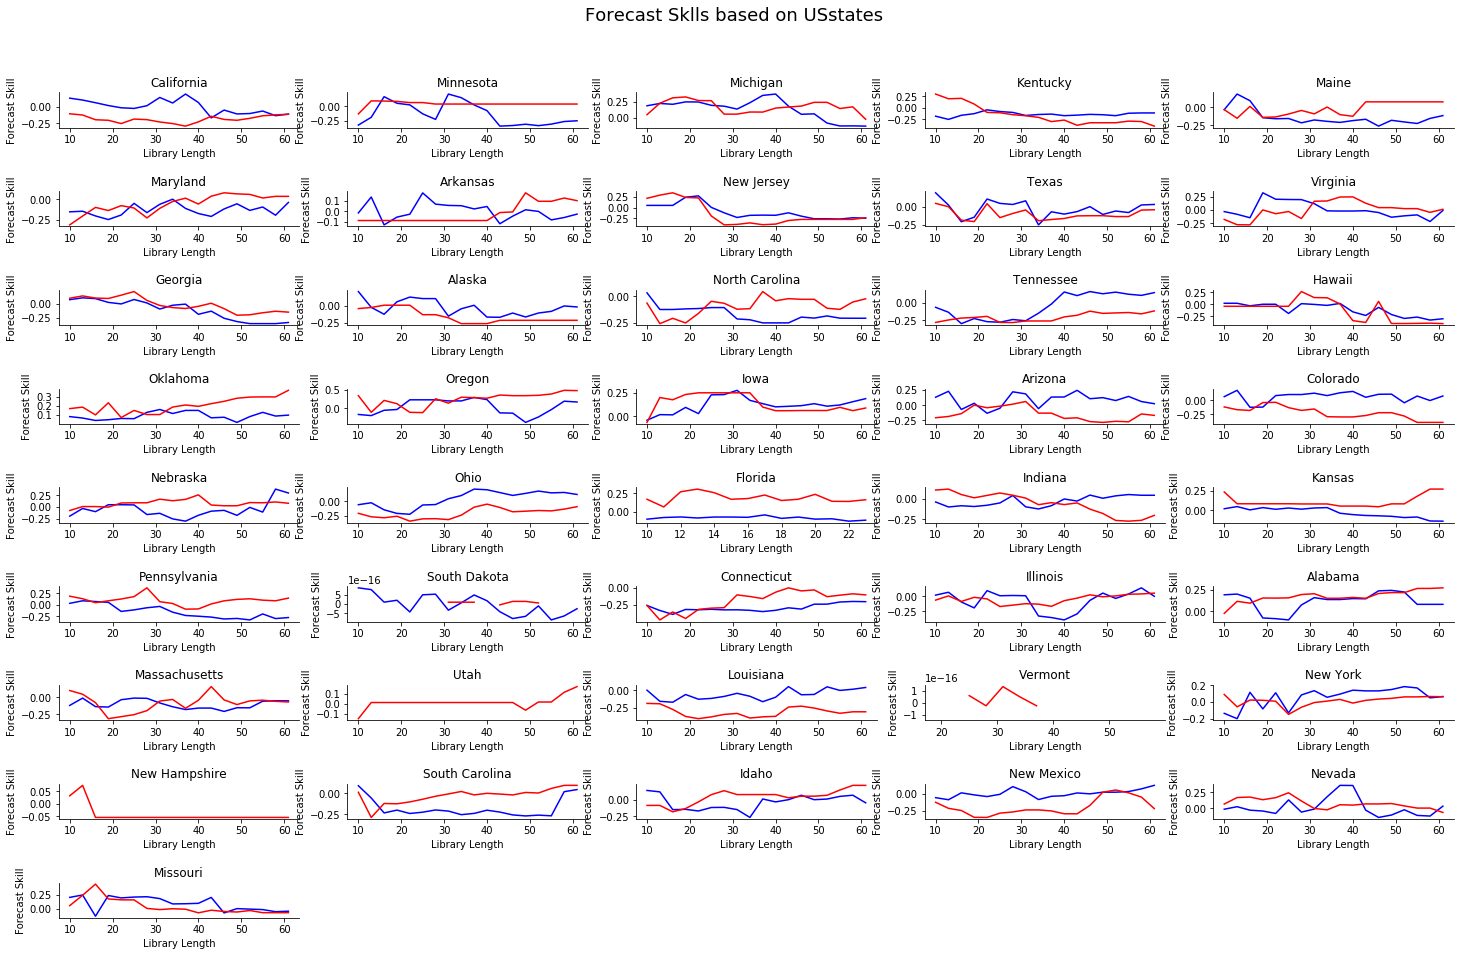

In [10]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

plt.figure(figsize=(25, 17))
plt.subplots_adjust(hspace=1.8)
plt.suptitle("Forecast Sklls based on USstates", fontsize=18, y=0.95)

for i in range(len(state_list)):
    
    data = merged_data[merged_data['USstate']==state_list[i]]
    curr_state = data['full'].iloc[0]
    data = data.groupby(['year','month']).sum()
    data['misogyny_proportion'] = data['nTweets_y'] / data['nTweets_x']
    
    # 0. extract data
    x1_misogyny_proportion = data['misogyny_proportion'].to_numpy()
    x2_rape_total = data['actual_rape_total'].to_numpy()
    
    # 1. Calculate Mutual information
    e1 = ccm.Embed(x1_misogyny_proportion)
    e2 = ccm.Embed(x2_rape_total)

    mi1 = e1.mutual_information(10)
    mi2 = e2.mutual_information(10)
               
    min_index1 = min(range(len(mi1)), key=mi1.__getitem__)
    min_index2 = min(range(len(mi2)), key=mi2.__getitem__)
    min_index1 = max(min_index1, 1)
    min_index2 = max(min_index2, 1)
    lag = max(min_index1, min_index2)
    
    # 2. Embed the time series
    perc_FNN, embed = FNN_n(x2_rape_total, lag, plotting = False)
    X1 = e1.embed_vectors_1d(lag,embed)
    X2 = e2.embed_vectors_1d(lag,embed)
    
    # 3. Forecast skill as a function of library length
    # split the embedded time series
    x1tr, x1te, x2tr, x2te = train_test_split(X1,X2, percent=.75)

    CCM = ccm.CCM() # initiate the class

    # library lengths to test
    len_tr = len(x1tr)
    lib_lens = np.arange(10, len_tr, len_tr/20, dtype='int')
    
    # test causation
    CCM.fit(x1tr,x2tr)
    x1p, x2p = CCM.predict(x1te, x2te,lib_lengths=lib_lens)
    
    sc1,sc2 = CCM.score()
    # plot
    ax = plt.subplot(10, 5, i+1)
    ax.plot(lib_lens,sc1,label='X1 xmap X2', color='blue') # misogyny_tweet predict crime
    ax.plot(lib_lens,sc2, label='X2 xmap X1', color='red') # crime predict misogyny_tweet
    ax.set_xlabel('Library Length')
    ax.set_ylabel('Forecast Skill')
    ax.set_title(curr_state)
    sns.despine()
    
plt.savefig('Forecast Sklls based on USstates.png')

### ii). First Differences of Rape Count vs Misogyny Tweets

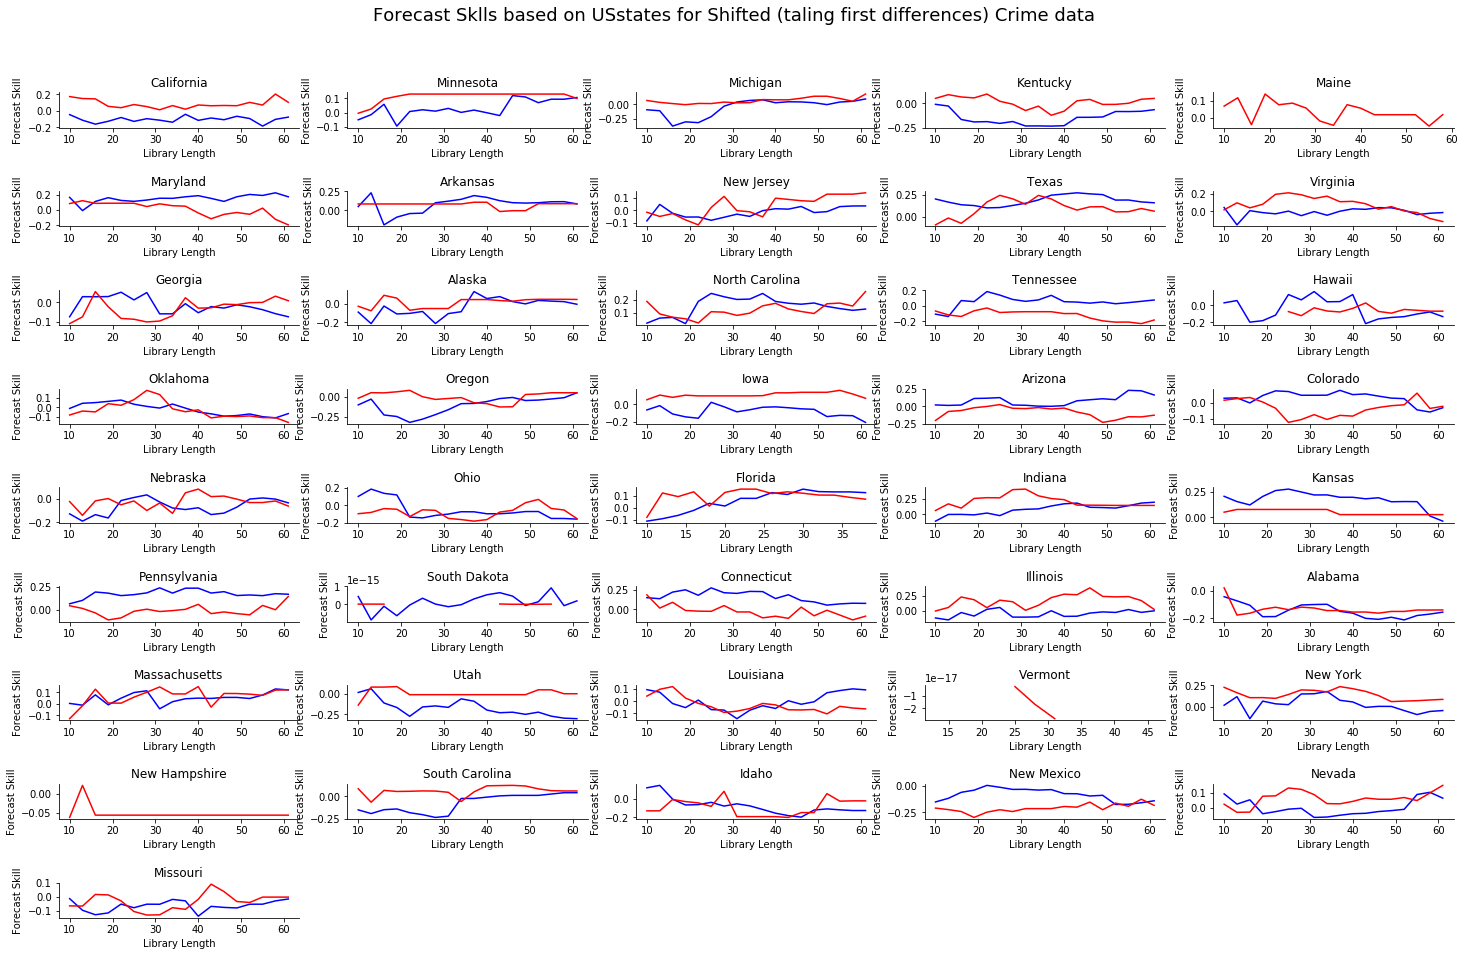

In [11]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

plt.figure(figsize=(25, 17))
plt.subplots_adjust(hspace=1.8)
plt.suptitle("Forecast Sklls based on USstates for Shifted (taling first differences) Crime data", fontsize=18, y=0.95)

for i in range(len(state_list)):
    
    data = merged_data[merged_data['USstate']==state_list[i]]
    curr_state = data['full'].iloc[0]
    data = data.groupby(['year','month']).sum()
    data['shifted_rape_total'] = data['actual_rape_total'] - data['actual_rape_total'].shift(-1)
    data['shifted_rape_total'] = data['shifted_rape_total'].fillna(0)
    data['misogyny_proportion'] = data['nTweets_y'] / data['nTweets_x']
    
    # 0. extract data
    x1_misogyny_proportion = data['misogyny_proportion'].to_numpy()
    x2_rape_total = data['shifted_rape_total'].to_numpy()
    
    # 1. Calculate Mutual information
    e1 = ccm.Embed(x1_misogyny_proportion)
    e2 = ccm.Embed(x2_rape_total)

    mi1 = e1.mutual_information(10)
    mi2 = e2.mutual_information(10)
               
    min_index1 = min(range(len(mi1)), key=mi1.__getitem__)
    min_index2 = min(range(len(mi2)), key=mi2.__getitem__)
    min_index1 = max(min_index1, 1)
    min_index2 = max(min_index2, 1)
    lag = max(min_index1, min_index2)
    
    # 2. Embed the time series
    perc_FNN, embed = FNN_n(x2_rape_total, lag, plotting = False)
    X1 = e1.embed_vectors_1d(lag,embed)
    X2 = e2.embed_vectors_1d(lag,embed)
    
    # 3. Forecast skill as a function of library length
    # split the embedded time series
    x1tr, x1te, x2tr, x2te = train_test_split(X1,X2, percent=.75)

    CCM = ccm.CCM() # initiate the class

    # library lengths to test
    len_tr = len(x1tr)
    lib_lens = np.arange(10, len_tr, len_tr/20, dtype='int')
    
    # test causation
    CCM.fit(x1tr,x2tr)
    x1p, x2p = CCM.predict(x1te, x2te,lib_lengths=lib_lens)
    
    sc1,sc2 = CCM.score()
    # plot
    ax = plt.subplot(10, 5, i+1)
    ax.plot(lib_lens,sc1,label='X1 xmap X2', color='blue') # misogyny_tweet predict crime
    ax.plot(lib_lens,sc2, label='X2 xmap X1', color='red') # crime predict misogyny_tweet
    ax.set_xlabel('Library Length')
    ax.set_ylabel('Forecast Skill')
    ax.set_title(curr_state)
    sns.despine()
    
plt.savefig('Forecast Sklls based on USstates for Shifted (taling first differences) Crime data.png')

# Part B: Country-wise

# 0. Extract data

In [12]:
merged_data10 = merged_data
merged_data10['misogyny_proportion'] = merged_data10['nTweets_y'] / merged_data10['nTweets_x']
merged_data10 = merged_data10.groupby(['year','month']).sum()
merged_data10['shifted_rape_total'] = merged_data10['actual_rape_total'] - merged_data10['actual_rape_total'].shift(-1)
merged_data10['shifted_rape_total'] = merged_data10['shifted_rape_total'].fillna(0)
merged_data10 = merged_data10.drop(columns=['nTweets_x','nTweets_y','Number of establishments (ESTAB)','population'])
merged_data10

actual_rape_total  cost_of_living_index  misogyny_proportion  \
year month                                                                 
2012 1                   5846           3186.833179             0.003657   
     2                   5349           3206.180004             0.003209   
     3                   6240           3226.909380             0.003085   
     4                   5811           3248.521511             0.003574   
     5                   6080           3270.516604             0.003604   
...                       ...                   ...                  ...   
2020 8                   9331           3018.820727             0.001829   
     9                   8866           3025.160965             0.001852   
     10                  8408           3031.471365             0.001854   
     11                  7519           3037.418122             0.001852   
     12                 14191           3042.667427             0.001884   

            shifted_rape_total  
year month                      
2012 1                   497.0  
     2                  -891.0  
     3                   429.0  
     4                  -269.0  
     5                  -953.0  
...                        ...  
2020 8                   465.0  
     9                   458.0  
     10                  889.0  
     11                -6672.0  
     12                    0.0  

[108 rows x 4 columns]

In [13]:
merged_data9 = merged_data
merged_data9['misogyny_proportion'] = merged_data9['nTweets_y'] / merged_data9['nTweets_x']
merged_data9 = merged_data9.groupby(['year','month']).sum()
merged_data9['shifted_rape_total'] = merged_data9['actual_rape_total'] - merged_data9['actual_rape_total'].shift(-1)
merged_data9['shifted_rape_total'] = merged_data9['shifted_rape_total'].fillna(0)
merged_data9 = merged_data9.drop(columns=['nTweets_x','nTweets_y','Number of establishments (ESTAB)','population',
                                         'cost_of_living_index'])
merged_data9

actual_rape_total  misogyny_proportion  shifted_rape_total
year month                                                            
2012 1                   5846             0.003657               497.0
     2                   5349             0.003209              -891.0
     3                   6240             0.003085               429.0
     4                   5811             0.003574              -269.0
     5                   6080             0.003604              -953.0
...                       ...                  ...                 ...
2020 8                   9331             0.001829               465.0
     9                   8866             0.001852               458.0
     10                  8408             0.001854               889.0
     11                  7519             0.001852             -6672.0
     12                 14191             0.001884                 0.0

[108 rows x 3 columns]

In [14]:
corr = merged_data9.corr() #reference correlation
corr

,actual_rape_total,misogyny_proportion,shifted_rape_total
actual_rape_total,1.000000,-0.236940,0.535238
misogyny_proportion,-0.236940,1.000000,-0.182564
shifted_rape_total,0.535238,-0.182564,1.000000


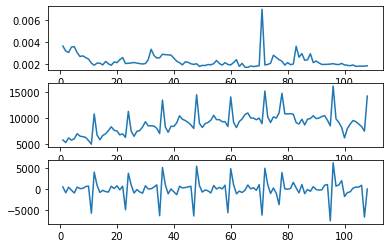

In [35]:
x1_tweet = merged_data10['misogyny_proportion'].to_numpy()
x2_crime = merged_data10['actual_rape_total'].to_numpy()
x3_shifted_crime = merged_data10['shifted_rape_total'].to_numpy()

fig,ax = plt.subplots(nrows=3,sharex=False,sharey=False)
ax[0].plot(np.arange(1,109),x1_tweet)
ax[1].plot(np.arange(1,109),x2_crime)
ax[2].plot(np.arange(1,109),x3_shifted_crime)

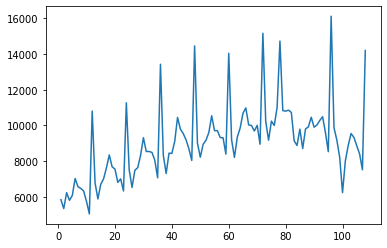

In [36]:
plt.plot(np.arange(1,109),x2_crime)
plt.savefig('actual_rape_total.png')

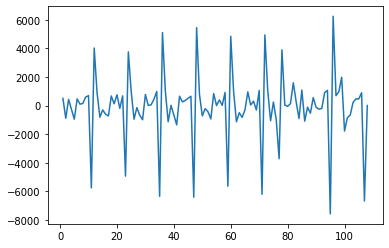

In [37]:
plt.plot(np.arange(1,109),x3_shifted_crime)
plt.savefig('shifted_rape_total.png')

## i). Tweet vs Rape Counts

### 1. Calculate Mutual information

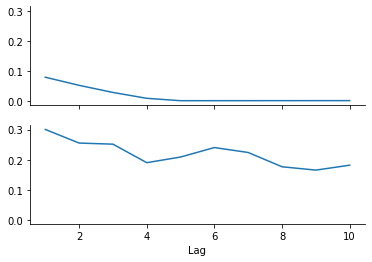

In [38]:
e1 = ccm.Embed(x1_tweet)
e2 = ccm.Embed(x2_crime)

mi1 = e1.mutual_information(10)
mi2 = e2.mutual_information(10)

fig,ax = plt.subplots(nrows=2,sharex=True,sharey=True)
ax[0].plot(np.arange(1,11),mi1)
ax[1].plot(np.arange(1,11),mi2)
ax[1].set_xlabel('Lag')
sns.despine()

### 2. Embed the time series 

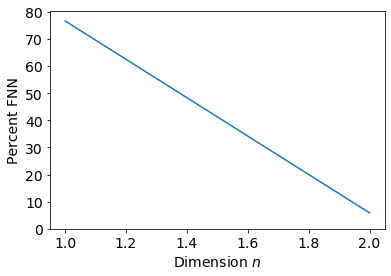

Lag Dimension:  8
FNN embedding Dimension:  2


In [39]:
min_index1 = min(range(len(mi1)), key=mi1.__getitem__)
min_index2 = min(range(len(mi2)), key=mi2.__getitem__)
min_index1 = max(min_index1, 1)
min_index2 = max(min_index2, 1)
lag = max(min_index1, min_index2)
perc_FNN, embed = FNN_n(x2_crime, lag, plotting = True)
print('Lag Dimension: ',lag)
print('FNN embedding Dimension: ',embed)
X1 = e1.embed_vectors_1d(lag,embed)
X2 = e2.embed_vectors_1d(lag,embed)

### 3. Forecast skill as a function of library length

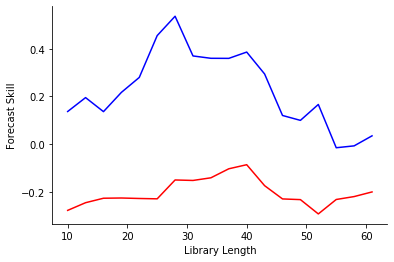

In [41]:
# split the embedded time series
x1tr, x1te, x2tr, x2te = train_test_split(X1,X2, percent=.75)

CCM = ccm.CCM() # initiate the class

# library lengths to test
len_tr = len(x1tr)
lib_lens = np.arange(10, len_tr, len_tr/20, dtype='int')

# test causation
CCM.fit(x1tr,x2tr)
x1p, x2p = CCM.predict(x1te, x2te,lib_lengths=lib_lens)

sc1,sc2 = CCM.score()

fig,ax = plt.subplots()
ax.plot(lib_lens,sc1,label='X1 xmap X2', color='blue') # misogyny_tweet predict crime
ax.plot(lib_lens,sc2, label='X2 xmap X1', color='red') # crime predict misogyny_tweet
ax.set_xlabel('Library Length')
ax.set_ylabel('Forecast Skill')
sns.despine()

## ii). Misogyny tweet vs First Differences of Rape Counts

### 1. Calculate Mutual information

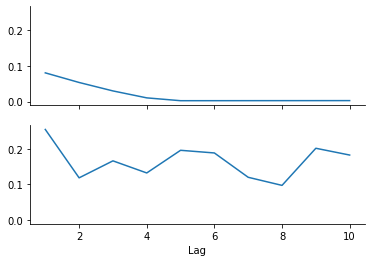

In [42]:
e1 = ccm.Embed(x1_tweet)
e2 = ccm.Embed(x3_shifted_crime)

mi1 = e1.mutual_information(10)
mi2 = e2.mutual_information(10)

fig,ax = plt.subplots(nrows=2,sharex=True,sharey=True)
ax[0].plot(np.arange(1,11),mi1)
ax[1].plot(np.arange(1,11),mi2)
ax[1].set_xlabel('Lag')
sns.despine()

### 2. Embed the time series

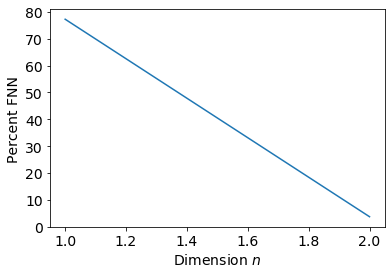

Lag Dimension:  7
FNN embedding Dimension:  2


In [43]:
min_index1 = min(range(len(mi1)), key=mi1.__getitem__)
min_index2 = min(range(len(mi2)), key=mi2.__getitem__)
min_index1 = max(min_index1, 1)
min_index2 = max(min_index2, 1)
lag = max(min_index1, min_index2)

perc_FNN, embed = FNN_n(x2_crime, lag, plotting = True)
print('Lag Dimension: ',lag)
print('FNN embedding Dimension: ',embed)
X1 = e1.embed_vectors_1d(lag,embed)
X2 = e2.embed_vectors_1d(lag,embed)

### 3. Forecast skill as a function of library length

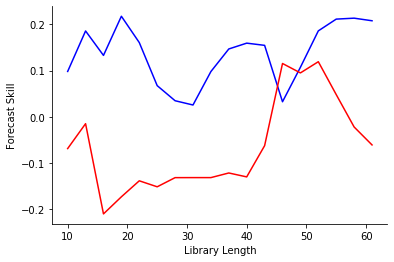

In [45]:
# split the embedded time series
x1tr, x1te, x2tr, x2te = train_test_split(X1,X2, percent=.75)

CCM = ccm.CCM() # initiate the class

# library lengths to test
len_tr = len(x1tr)
lib_lens = np.arange(10, len_tr, len_tr/20, dtype='int')

# test causation
CCM.fit(x1tr,x2tr)
x1p, x2p = CCM.predict(x1te, x2te,lib_lengths=lib_lens)

sc1,sc2 = CCM.score()

fig,ax = plt.subplots()
ax.plot(lib_lens,sc1,label='X1 xmap X2', color='blue') # misogyny_tweet predict crime
ax.plot(lib_lens,sc2, label='X2 xmap X1', color='red') # crime predict misogyny_tweet
ax.set_xlabel('Library Length')
ax.set_ylabel('Forecast Skill')
sns.despine()

# Michigan University Dataset

In [15]:
crime_df = pd.read_csv('crime_oldversion.csv',index_col=0)
abbr_name = pd.read_csv('abbr-name.csv')
abbr_name['abbr'] = abbr_name['abbr'].str.lower()
state = abbr_name['abbr'].to_list()

In [16]:
crime = crime_df[['STATE', 'YEAR', 'MONTH', 'OFFENSE', 'OCCUR', 'POP']]
crime['STATE'] = crime['STATE'].str.capitalize()
crime = pd.merge(crime, abbr_name, left_on='STATE', right_on='full', how='left')
crime = crime.drop(columns=['full', 'OFFENSE'])

crime_agg = crime.groupby(['MONTH','YEAR','abbr']).sum().reset_index()
crime_agg = crime_agg.rename(columns={'MONTH': 'month','OCCUR': 'crime_counts', 'YEAR':'year', 'abbr':'USstate'})
crime_agg['month'] = crime_agg['month'].astype(int)
crime_agg['year'] = crime_agg['year'].astype(int)
crime_agg = crime_agg.drop(columns=['POP'])

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
crime_agg

,month,year,USstate,crime_counts
0,1,2012,ak,50
1,1,2012,ar,41
2,1,2012,az,259
3,1,2012,ca,1158
4,1,2012,co,255
...,...,...,...,...
1820,12,2015,va,321
1821,12,2015,vt,47
1822,12,2015,wa,176
1823,12,2015,wi,635


In [18]:
crime_agg_year = crime_agg.groupby(['year','month']).sum().reset_index()
crime_agg_year

,year,month,crime_counts
0,2012,1,6774
1,2012,2,6748
2,2012,3,7093
3,2012,4,6915
4,2012,5,7523
5,2012,6,7374
6,2012,7,7390
7,2012,8,7433
8,2012,9,6989
9,2012,10,6857


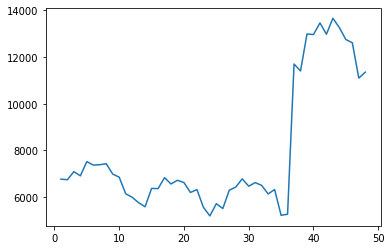

In [19]:
x2_crime = crime_agg_year['crime_counts'].to_numpy()
plt.plot(np.arange(1,49),x2_crime)

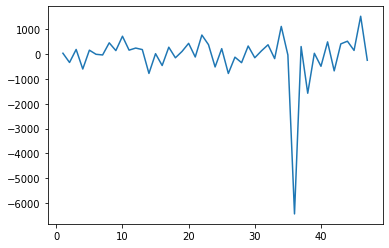

In [20]:
crime_agg_year['shifted_crime_counts'] = crime_agg_year['crime_counts'] - crime_agg_year['crime_counts'].shift(-1)
x1_shifted_rape_total = crime_agg_year['shifted_crime_counts'].to_numpy()
plt.plot(np.arange(1,49),x1_shifted_rape_total)

In [21]:
data = pd.read_csv('merged_data.csv',index_col=0)
data = pd.merge(data, crime_agg, left_on=['USstate', 'year', 'month'], 
         right_on=['USstate', 'year', 'month'], how='right')
data = data.groupby(['year','month']).sum()
data['shifted_crime_counts'] = data['crime_counts'] - data['crime_counts'].shift(-1)
data['shifted_crime_counts'] = data['shifted_crime_counts'].fillna(0)
data['misogyny_proportion'] = data['nTweets_y'] / data['nTweets_x']
data = data.drop(columns=['nTweets_x','nTweets_y','Number of establishments (ESTAB)','actual_rape_total','population','cost_of_living_index'])
data.head()

crime_counts  shifted_crime_counts  misogyny_proportion
year month                                                         
2012 1              6774                  26.0             0.000047
     2              6748                -345.0             0.000040
     3              7093                 178.0             0.000043
     4              6915                -608.0             0.000049
     5              7523                 149.0             0.000044

In [22]:
corr = data.corr() #reference correlation
corr

,crime_counts,shifted_crime_counts,misogyny_proportion
crime_counts,1.000000,0.156465,-0.313543
shifted_crime_counts,0.156465,1.000000,-0.156914
misogyny_proportion,-0.313543,-0.156914,1.000000


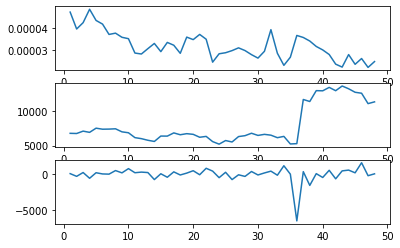

In [24]:
x1_tweet = data['misogyny_proportion'].to_numpy()
x2_crime = data['crime_counts'].to_numpy()
x3_shifted_crime = data['shifted_crime_counts'].to_numpy()

fig,ax = plt.subplots(nrows=3,sharex=False,sharey=False)
ax[0].plot(np.arange(1,49),x1_tweet)
ax[1].plot(np.arange(1,49),x2_crime)
ax[2].plot(np.arange(1,49),x3_shifted_crime)

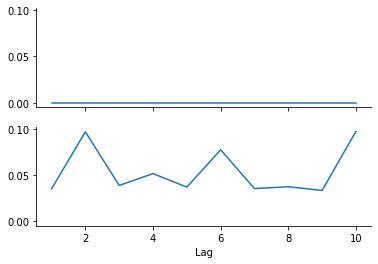

In [25]:
e1 = ccm.Embed(x1_tweet)
e2 = ccm.Embed(x3_shifted_crime)

mi1 = e1.mutual_information(10)
mi2 = e2.mutual_information(10)

fig,ax = plt.subplots(nrows=2,sharex=True,sharey=True)
ax[0].plot(np.arange(1,11),mi1)
ax[1].plot(np.arange(1,11),mi2)
ax[1].set_xlabel('Lag')
sns.despine()

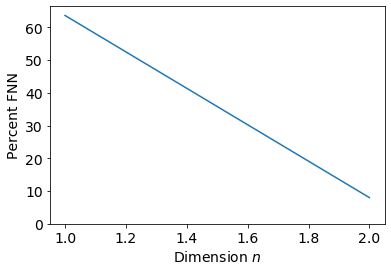

Lag Dimension:  8
FNN embedding Dimension:  2


In [26]:
min_index1 = min(range(len(mi1)), key=mi1.__getitem__)
min_index2 = min(range(len(mi2)), key=mi2.__getitem__)
min_index1 = max(min_index1, 1)
min_index2 = max(min_index2, 1)
lag = max(min_index1, min_index2)

perc_FNN, embed = FNN_n(x3_shifted_crime, lag, plotting = True)
print('Lag Dimension: ',lag)
print('FNN embedding Dimension: ',embed)
X1 = e1.embed_vectors_1d(lag,embed)
X2 = e2.embed_vectors_1d(lag,embed)

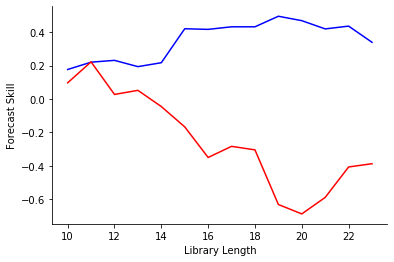

In [27]:
# split the embedded time series
x1tr, x1te, x2tr, x2te = train_test_split(X1,X2, percent=.75)

CCM = ccm.CCM() # initiate the class

# library lengths to test
len_tr = len(x1tr)
lib_lens = np.arange(10, len_tr, len_tr/20, dtype='int')

# test causation
CCM.fit(x1tr,x2tr)
x1p, x2p = CCM.predict(x1te, x2te,lib_lengths=lib_lens)

sc1,sc2 = CCM.score()

fig,ax = plt.subplots()
ax.plot(lib_lens,sc1,label='X1 xmap X2', color='blue') # misogyny_tweet predict crime
ax.plot(lib_lens,sc2, label='X2 xmap X1', color='red') # crime predict misogyny_tweet
ax.set_xlabel('Library Length')
ax.set_ylabel('Forecast Skill')
sns.despine()